# NeuroMet

Instructions:
* this notebook cannot be used for two different analysis at the same time. If you are unsure if someone is using it click on File / Make a copy and work with the copy.
* to run a cell press Umschalt (Shift) + Enter
* to correctly run the workflow _EVERY_ cell has to be ran
* When you run a cell, there is at first an [*] on the left, then a number (maybe an updated number) when the cell ran.
* normally the only thing to adjust in the settings is 1.6 Subject

## 0. External Modules

red warnings are normal in next cell

In [1]:
import importlib, os, glob 
import workflows
importlib.reload(workflows)
from workflows.NeuroMet2_dev_fs7 import NeuroMet
from IPython.display import Image
%matplotlib inline

200827-15:49:57,724 nipype.utils WARNING:
	 Could not check for version updates: 
Connection to server could not be made


## 1. Settings

In [2]:
## Paths
raw_data_dir = '/media/drive_s/AG/AG-Floeel-Imaging/00-Rohdaten/02_niftis/NeuroMET2_LauraGöschel/2_Messkohorte'
base_dir = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2'
temp_dir = '/home/WorkFlowTemp/NeuroMet2_fs7'

#Working directory
w_dir = os.path.join(base_dir, 'Structural_Analysis_fs7')

#qdec
qdec_subfolder = ''

#cores
cores = 6
omp_nthreads = 3

#overwrite copied files?
overwrite = False

### 1.2 Subjects

**subject_list**:
* to analyze all subjects cut&paste below: `subject_list = [ x.split('/')[-1][8:11] for x in os.listdir(w_dir) if x.startswith('NeuroMet')]`
* to analyse only some subjects use the format: `subject_list = ['subject number', 'subject number' ... ]` i.e.: `subject_list = ['001']` or `subject_list = ['001', '003']` 

**qdec_subjects**:
* to analyze all subjects in folder: `qdec_subjects = []`
* to analyze the same subjects as in `subject_list`: `qdec_subjects = subject_list`
* to analyse only some subjects use the format: `qdec_subjects = ['subject number', 'subject number' ... ]` i.e.: `qdec_subjects = ['001']` or `qdec_subjects = ['001', '003']` 

In [3]:
subject_list = ['2006T1', '2014T1', '2039T1', '2013T1', '2015T1', '2027T1', '2047T1', '2052T1', '2098T1', '2100T1', '2101T1', '2102T1', '2104T1']
#subject_list = ['2004']
qdec_subjects = []

In [4]:
len(subject_list)

13

## 2. Create a NeuroMet Object

In [5]:
neuromet_creator = NeuroMet(subject_list, temp_dir, w_dir, omp_nthreads, raw_data_dir, overwrite, qdec_subjects, qdec_subfolder)

# Workflow - 1st part - SPM Segment and Mask generation

## 3. Copy from raw data

In [6]:
neuromet_creator.copy_from_raw_data()

Copying NeuroMET2_006_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_014_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_039_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_013_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_015_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_027_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_047_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_052_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_098_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_100_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_101_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_102_T1
File exists, Skipping copy
File exists, Skipping copy
Copying NeuroMET2_104_T1
File exists, Skipping copy


In [7]:
neuromet = neuromet_creator.make_neuromet1_workflow()

200827-15:50:08,818 nipype.workflow INFO:
	 Generated workflow graph: ./neuromet.png (graph2use=colored, simple_form=True).


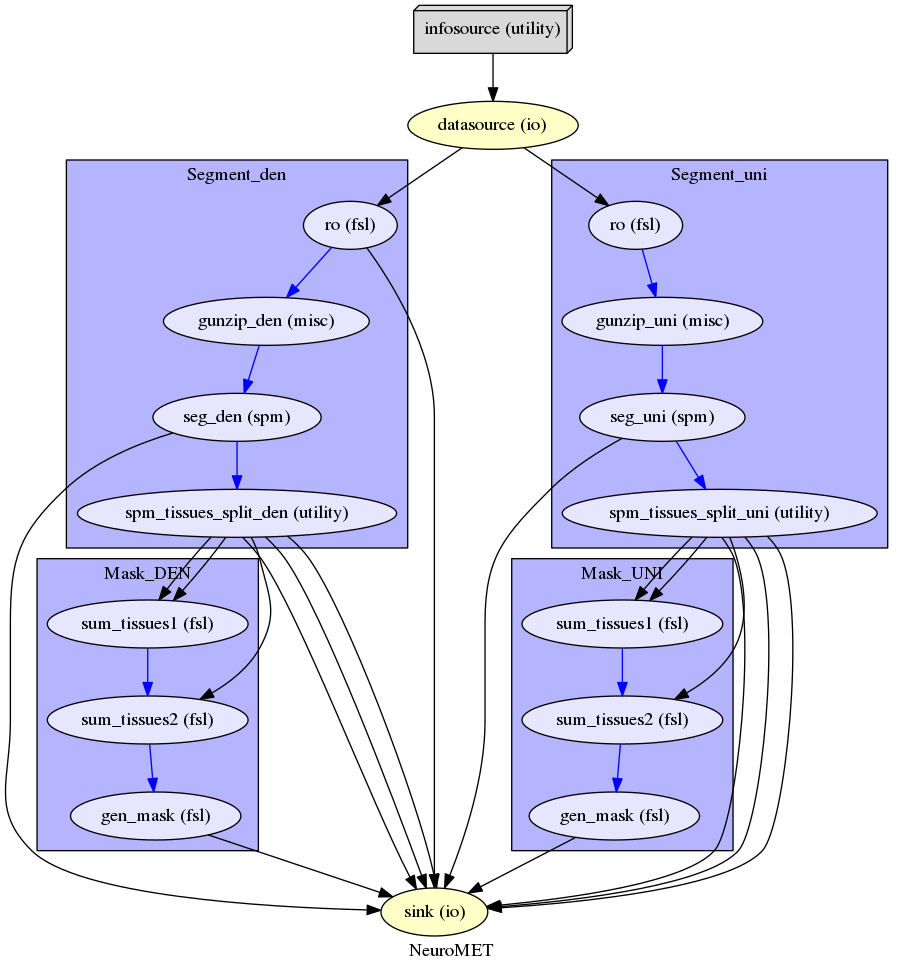

In [8]:
neuromet.write_graph(graph2use = 'colored', dotfilename = './neuromet')
Image(filename='neuromet.png')

## 4. Run Pipeline

In [9]:
%%time
neuromet.run('MultiProc', plugin_args={'n_procs': cores})

200827-15:50:09,3 nipype.workflow INFO:
	 Workflow NeuroMET settings: ['check', 'execution', 'logging', 'monitoring']
200827-15:50:09,79 nipype.workflow INFO:
	 Running in parallel.
200827-15:50:09,85 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 13 jobs ready. Free memory (GB): 28.15/28.15, Free processors: 6/6.
200827-15:50:09,136 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.datasource" in "/home/WorkFlowTemp/NeuroMet2_fs7/NeuroMET/_subject_id_2_102_T1/datasource".
200827-15:50:09,138 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.datasource" in "/home/WorkFlowTemp/NeuroMet2_fs7/NeuroMET/_subject_id_2_101_T1/datasource".200827-15:50:09,140 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.datasource" in "/home/WorkFlowTemp/NeuroMet2_fs7/NeuroMET/_subject_id_2_100_T1/datasource".200827-15:50:09,142 nipype.workflow INFO:
	 [Node] Running "datasource" ("nipype.interfaces.io.DataGrabber")

200827-15:50:09,142 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.da

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_104_T1/NeuroMET2_104_T1.DEN_mp2rage_orig_reoriented.nii.gz -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_104_T1/NeuroMET2_104_T1.DEN_mp2rage_orig_reoriented.nii.gz
200827-15:50:25,620 nipype.workflow INFO:
	 [Job 65] Cached (NeuroMET.Segment_uni.ro).
200827-15:50:25,699 nipype.workflow INFO:
	 [Node] Running "sink" ("nipype.interfaces.io.DataSink")
200827-15:50:25,702 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_101_T1/NeuroMET2_101_T1.DEN_mp2rage_orig_reoriented.nii.gz -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_101_T1/NeuroMET2_101_T1.DEN_mp2rage_orig_reoriented.nii.gz
200827-15:50:25,704 nipype.workflow INFO:
	 [Node] Running "sink" ("nipype.interfaces.io.DataSink")
200827-15:50:25,707 nipype.interface INFO:
	 sub: /med

	 [Node] Running "sink" ("nipype.interfaces.io.DataSink")
200827-15:50:39,799 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_100_T1/NeuroMET2_100_T1.DEN_mp2rage_orig_reoriented.nii.gz -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_100_T1/NeuroMET2_100_T1.DEN_mp2rage_orig_reoriented.nii.gz
200827-15:50:41,116 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 10 jobs ready. Free memory (GB): 27.35/28.15, Free processors: 2/6.
                     Currently running:
                       * NeuroMET.sink
                       * NeuroMET.sink
                       * NeuroMET.sink
                       * NeuroMET.sink
200827-15:50:41,271 nipype.workflow INFO:
	 [Job 73] Cached (NeuroMET.Segment_den.gunzip_den).
200827-15:50:41,352 nipype.workflow INFO:
	 [Job 82] Cached (NeuroMET.Segment_uni.gunzip_uni).
200827-15:50:42,861 nipype.interface INFO:
	 sub: /media/dri

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_102_T1/mNeuroMET2_102_T1.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_102_T1/mNeuroMET2_102_T1.UNI_mp2rage_orig_reoriented.nii
200827-15:50:53,124 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 9 jobs ready. Free memory (GB): 27.35/28.15, Free processors: 2/6.
                     Currently running:
                       * NeuroMET.sink
                       * NeuroMET.sink
                       * NeuroMET.sink
                       * NeuroMET.sink
200827-15:50:53,362 nipype.workflow INFO:
	 [Node] Outdated cache found for "NeuroMET.sink".
200827-15:50:53,374 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.sink" in "/home/WorkFlowTemp/NeuroMet2_fs7/NeuroMET/_subject_id_2_098_T1/sink".
200827-15:50:53,381 nipype.workflow INFO:
	 [Node] Outdated cache found for "NeuroMET.sink".
200827-15:50:53,45

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_098_T1/mNeuroMET2_098_T1.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_098_T1/mNeuroMET2_098_T1.DEN_mp2rage_orig_reoriented.nii
200827-15:51:06,764 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_100_T1/mNeuroMET2_100_T1.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_100_T1/mNeuroMET2_100_T1.UNI_mp2rage_orig_reoriented.nii
200827-15:51:07,135 nipype.workflow INFO:
	 [Job 112] Completed (NeuroMET.datasource).
200827-15:51:07,144 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 10 jobs ready. Free memory (GB): 27.75/28.15, Free processors: 4/6.
                     Currently running:
                       * NeuroMET.sink
                       * NeuroMET.sink

200827-15:51:21,290 nipype.workflow INFO:
	 [Job 121] Cached (NeuroMET.Segment_den.gunzip_den).
200827-15:51:21,355 nipype.workflow INFO:
	 [Job 129] Cached (NeuroMET.Segment_uni.ro).
200827-15:51:21,383 nipype.workflow INFO:
	 [Job 136] Cached (NeuroMET.Segment_den.ro).
200827-15:51:22,326 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_098_T1/c2NeuroMET2_098_T1.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_098_T1/c2NeuroMET2_098_T1.UNI_mp2rage_orig_reoriented.nii
200827-15:51:23,238 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_047_T1/c1NeuroMET2_047_T1.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_047_T1/c1NeuroMET2_047_T1.DEN_mp2rage_orig_reoriented.nii
200827-15:51:23,313 nipype.wor

200827-15:51:37,262 nipype.workflow INFO:
	 [Job 145] Cached (NeuroMET.Segment_uni.ro).
200827-15:51:37,393 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_027_T1/c1NeuroMET2_027_T1.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_027_T1/c1NeuroMET2_027_T1.DEN_mp2rage_orig_reoriented.nii
200827-15:51:37,470 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_052_T1/mNeuroMET2_052_T1.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_052_T1/mNeuroMET2_052_T1.UNI_mp2rage_orig_reoriented.nii
200827-15:51:37,485 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_098_T1/c1NeuroMET2_098_T1.UNI_mp2rage_orig_reoriented_maths_maths_bin.nii.

200827-15:51:51,174 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 5 jobs ready. Free memory (GB): 27.55/28.15, Free processors: 3/6.
                     Currently running:
                       * NeuroMET.sink
                       * NeuroMET.sink
                       * NeuroMET.sink
200827-15:51:51,322 nipype.workflow INFO:
	 [Job 158] Cached (NeuroMET.Mask_DEN.gen_mask).
200827-15:51:51,392 nipype.workflow INFO:
	 [Job 161] Cached (NeuroMET.Segment_uni.ro).
200827-15:51:51,433 nipype.workflow INFO:
	 [Job 168] Cached (NeuroMET.Segment_den.ro).
200827-15:51:53,370 nipype.workflow INFO:
	 [Node] Outdated cache found for "NeuroMET.sink".
200827-15:51:53,382 nipype.workflow INFO:
	 [Node] Setting-up "NeuroMET.sink" in "/home/WorkFlowTemp/NeuroMet2_fs7/NeuroMET/_subject_id_2_013_T1/sink".
200827-15:51:53,387 nipype.workflow INFO:
	 [Node] Outdated cache found for "NeuroMET.sink".
200827-15:51:53,441 nipype.workflow INFO:
	 [Node] Running "sink" ("nipype.interfaces.io.DataS

	 [Node] Outdated cache found for "NeuroMET.sink".
200827-15:52:05,295 nipype.workflow INFO:
	 [Node] Running "sink" ("nipype.interfaces.io.DataSink")
200827-15:52:05,298 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_039_T1/NeuroMET2_039_T1.DEN_mp2rage_orig_reoriented.nii.gz -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_039_T1/NeuroMET2_039_T1.DEN_mp2rage_orig_reoriented.nii.gz
200827-15:52:05,413 nipype.workflow INFO:
	 [Job 177] Cached (NeuroMET.Segment_uni.ro).
200827-15:52:05,442 nipype.workflow INFO:
	 [Job 184] Cached (NeuroMET.Segment_den.ro).
200827-15:52:05,904 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_013_T1/mNeuroMET2_013_T1.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_013_T1/mNeuroMET2_013_T1.DEN_mp2

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_015_T1/c1NeuroMET2_015_T1.UNI_mp2rage_orig_reoriented_maths_maths_bin.nii.gz -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_015_T1/NeuroMET2_015_T1.UNI_brain_bin.nii.gz200827-15:52:19,779 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_014_T1/NeuroMET2_014_T1.DEN_mp2rage_orig_reoriented.nii.gz -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_014_T1/NeuroMET2_014_T1.DEN_mp2rage_orig_reoriented.nii.gz

200827-15:52:20,135 nipype.workflow INFO:
	 [Node] Finished "NeuroMET.sink".
200827-15:52:20,649 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_013_T1/c3NeuroMET2_013_T1.UNI_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Str

	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_006_T1/c1NeuroMET2_006_T1.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_006_T1/c1NeuroMET2_006_T1.DEN_mp2rage_orig_reoriented.nii
200827-15:52:40,111 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_014_T1/c1NeuroMET2_014_T1.DEN_mp2rage_orig_reoriented_maths_maths_bin.nii.gz -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_014_T1/NeuroMET2_014_T1.DEN_brain_bin.nii.gz
200827-15:52:40,172 nipype.interface INFO:
	 sub: /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/_subject_id_2_006_T1/c2NeuroMET2_006_T1.DEN_mp2rage_orig_reoriented.nii -> /media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/NeuroMET2_006_T1/c2NeuroMET2_006_T1.DEN_mp2rage_orig_reori

# Workflow 2. Part - Create combined image and Freesurfer

## 05. Print current Subjects 

In [ ]:
print(subject_list)

## 06.Edit Subjects list 

**Subject List**:
* to analyze all subjects cut&paste below: `subject_list = [ x.split('/')[-1][8:11] for x in uni ]` already existing analyses will _NOT_ be run again neither overwritten
* to analyse only some subjects cut&paste below something with the format: `subject_list = ['subject number', 'subject number' ... ]` i.e.: `subject_list = ['001']` or `subject_list = ['001', '003']
* leave the next cell commented to mantain the actual list

In [ ]:
# Uncomment here for all subjects:
#subject_list = [ x.split('/')[-1][8:11] for x in uni ]

# only some subjects? Then edit here:  
#subject_list = ['2004']

## SetUp Workflow
Just run this cell to setup the Workflow - nothing to edit

In [ ]:
neuromet_creator = NeuroMet(subject_list, temp_dir, w_dir, omp_nthreads, raw_data_dir, overwrite, spm_path, matlab_command, fsl_file_format, qdec_subjects, qdec_subfolder)
neuromet2 = neuromet_creator.make_neuromet2_workflow()

## Draw Workflow's Graph
Run this cell to draw the workflow's graph

In [ ]:
neuromet2.write_graph(graph2use = 'colored', dotfilename = './neuromet_2')
Image(filename='neuromet_2.png')

## Run Freesurfer Analysis
run the cell below to run the analysis

In [ ]:
%%time
neuromet2.run('MultiProc', plugin_args={'n_procs': cores})

In [ ]:
def get_mask_name(subject_id):
    import pandas as pd
    # ToDo: correct this hard-coded mask_file
    # TypeError: get_mask_name() missing 1 required positional argument: 'self
    mask_file = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/List_UNI_DEN_Mask.xlsx'
    df = pd.read_excel(mask_file, header=None, names=['ids', 'masks', 'note'])
    d = dict(zip(df.ids.values, df.masks.values))
    return d['NeuroMET' + subject_id]


In [ ]:
os.path.isfile('/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET2/Structural_Analysis_fs7/List_UNI_DEN_Mask.xlsx')

In [ ]:
get_mask_name('2004')

## 07. Qdec

In [ ]:
s = neuromet_creator.show_qdec_stuff()
print(s)

In [ ]:
%%bash -s "$w_dir"
SUBJECTS_DIR=$1
cd $SUBJECTS_DIR
qdec&

## 08. Extract Hippocampal volumes

In [ ]:
%%bash -s "$w_dir" "$subject_list"
SUBJECTS_DIR=$1
echo $FREESURFER_HOME
echo $SUBJECTS_DIR
subject_list=$2
cmd="/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/bash-scripts/HippocampalVolumeExtraction"
cd $SUBJECTS_DIR
$cmd ${subject_list//[\',\[\]]}

In [ ]:
import pandas as pd
out_file = '/media/drive_s/AG/AG-Floeel-Imaging/02-User/NEUROMET/Structural_analysis'
df = pd.read_csv(out_file, sep = ' ')
writer = pd.ExcelWriter('HippocampusSubfieldVolume.xlsx')
df.to_excel(writer,'HippocampusSubfieldVolume')
writer.save()